In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DELIVERABLE 02

## Problem Statement: Analyse the transcripts and call reasons to identify granular reasons associated to recurring problems that could be resolved via self-service options in the IVR system.

### Cleaning customer.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
## Loading customer.csv
customer_df = pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/customers2afd6ea_updated2.csv')

In [126]:
customer_df.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [127]:
## Getting Unique Values of elite_level_code to check no other types are there
customer_df['elite_level_code'].unique()

array([ 4., nan,  2.,  0.,  5.,  1.,  3.])

In [128]:
# count of each elite level code
elite_level_counts = customer_df['elite_level_code'].value_counts()

# Displaying counts
print("Elite level code counts:")
print(elite_level_counts)

Elite level code counts:
elite_level_code
0.0    14387
1.0    14370
2.0     8028
3.0     5736
4.0     2125
5.0     1397
Name: count, dtype: int64


In [129]:
## Checking NULL values
customer_df.isnull().sum()

,0
customer_id,0
customer_name,0
elite_level_code,25767


25k rows are empty i=in elite_levek_code

NULL VALUES Handling

In [130]:
# Step 1: Calculating the distribution (ratios) of existing elite level codes
elite_level_counts = customer_df['elite_level_code'].value_counts(normalize=True)

In [131]:
# Step 2: Generating random choices based on these ratios to fill null values
null_count = customer_df['elite_level_code'].isnull().sum()
filled_values = np.random.choice(elite_level_counts.index, size=null_count, p=elite_level_counts.values)

In [132]:
# Step 3: Fill the null values with the generated values in original DataFRAme
customer_df.loc[customer_df['elite_level_code'].isnull(), 'elite_level_code'] = filled_values

# Displaying the updated DataFrame
customer_df.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,5.0
2,2416856629,Jeffery Dixon,1.0
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [133]:
customer_df.isnull().sum()

,0
customer_id,0
customer_name,0
elite_level_code,0


Now NULL Values are 0

### Merging DELIVERABLE01 data with customer.csv

In [136]:
df= pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/cleaned_merged_data.csv')

In [137]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,1122072124,8186702651,519057,08-01-2024 00:03,08-01-2024 00:06,08-01-2024 00:18,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking
1,2266439882,1154544516,488324,08-01-2024 00:05,08-01-2024 00:10,08-01-2024 00:17,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade
2,1211603231,5214456437,721730,08-01-2024 00:04,08-01-2024 00:14,08-01-2024 00:23,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating
3,5297766997,5590154991,817160,08-01-2024 00:11,08-01-2024 00:16,08-01-2024 00:40,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus
4,324593040,6774865122,519057,08-01-2024 00:08,08-01-2024 00:21,08-01-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout


In [138]:
df.isnull().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
agent_tone,0
customer_tone,0
average_sentiment,0


Handling datetime type data

In [139]:
# datetime columns
datetime_columns = ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']

# each datetime column to convert formats
for col in datetime_columns:
    # Replace '/' with '-'
    df[col] = df[col].astype(str).str.replace('/', '-', regex=False)
    df[col] = pd.to_datetime(df[col], errors='coerce')


print(df[datetime_columns].head())

  call_start_datetime agent_assigned_datetime   call_end_datetime
0 2024-08-01 00:03:00     2024-08-01 00:06:00 2024-08-01 00:18:00
1 2024-08-01 00:05:00     2024-08-01 00:10:00 2024-08-01 00:17:00
2 2024-08-01 00:04:00     2024-08-01 00:14:00 2024-08-01 00:23:00
3 2024-08-01 00:11:00     2024-08-01 00:16:00 2024-08-01 00:40:00
4 2024-08-01 00:08:00     2024-08-01 00:21:00 2024-08-01 00:34:00


In [141]:
# Verify the conversion
type(df['call_start_datetime'][800])

pandas._libs.tslibs.timestamps.Timestamp

Merging Data

In [142]:
merged_df = df.merge(customer_df, on='customer_id')

In [143]:
merged_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,5.0
1,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2.0
2,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0.0
3,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus,Emily Alexander,5.0
4,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,James Lawrence,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64199,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.19,0.51,Mileage_Plus,Kevin Warner,2.0
64200,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.05,0.34,Post_Flight,Dennis Singleton DDS,1.0
64201,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,calm,frustrated,0.03,0.22,Upgrade,Paul Mitchell,1.0
64202,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,calm,polite,0.05,0.42,Upgrade,Kaylee Lang,1.0


In [144]:
%cd /content/drive/MyDrive/SKYHACK_DATA

/content/drive/MyDrive/SKYHACK_DATA


In [145]:
# saving this cleaned and merged data for deliverable 2 so next time i can directly load this without cleaning
merged_df.to_csv('merged_clean_deliverable02.csv', index=False)

In [123]:
# Loading merged _cleaned data
merged_df=pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/merged_clean_deliverable02.csv')

In [149]:
# Doing AHT and AST Columns
merged_df['AHT'] = (merged_df['call_end_datetime'] - merged_df['agent_assigned_datetime']).dt.total_seconds() / 60
merged_df['AST'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60

In [150]:
# Display basic statistics
merged_df.describe()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,average_sentiment,silence_percent_average,elite_level_code,AHT,AST
count,6.420400e+04,6.420400e+04,64204.000000,64204,64204,64204,64204.000000,64204.000000,64204.000000,64204.000000,64204.000000
mean,4.994448e+09,5.005338e+09,564452.635568,2024-08-16 10:59:03.907233024,2024-08-16 11:06:20.929536768,2024-08-16 11:18:09.287271936,-0.029242,0.287464,1.373497,11.805962,7.283705
min,1.316420e+05,4.430700e+05,102574.000000,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:17:00,-0.350000,0.000000,0.000000,0.000000,3.000000
25%,2.480962e+09,2.513603e+09,347606.000000,2024-08-09 11:30:45,2024-08-09 11:38:00,2024-08-09 11:51:00,-0.100000,0.130000,0.000000,4.000000,5.000000
50%,4.988884e+09,5.003903e+09,591778.000000,2024-08-17 09:11:00,2024-08-17 09:18:00,2024-08-17 09:31:00,-0.020000,0.260000,1.000000,7.000000,7.000000
75%,7.493565e+09,7.507679e+09,786323.000000,2024-08-24 14:17:00,2024-08-24 14:25:00,2024-08-24 14:36:00,0.040000,0.410000,2.000000,15.000000,9.000000
max,9.999669e+09,9.999935e+09,993862.000000,2024-08-31 23:55:00,2024-08-31 23:59:00,2024-09-01 01:33:00,0.290000,0.980000,5.000000,119.000000,15.000000
std,2.889677e+09,2.883941e+09,257444.432487,NaN,NaN,NaN,0.117533,0.191536,1.325265,12.996951,2.520539


In [ ]:
print("\nTop 10 primary call reasons:")
print(merged_df['primary_call_reason'].value_counts().head(10))


Top 10 primary call reasons:
primary_call_reason
IRROPS                 12676
Voluntary_Change       10560
Seating                 6150
Mileage_Plus            5710
Post_Flight             4153
Communications          3716
Products & Services     3220
Baggage                 2682
Upgrade                 2657
Booking                 2520
Name: count, dtype: int64


In [ ]:
# Analyzing sentiment distribution
print("\nCustomer sentiment distribution:")
print(merged_df['customer_tone'].value_counts(normalize=True))


Customer sentiment distribution:
customer_tone
neutral       0.201031
polite        0.200642
angry         0.200439
calm          0.199614
frustrated    0.198274
Name: proportion, dtype: float64


In [ ]:
# Analyzing call duration
print("\nAverage AST  duration (minutes):", merged_df['AST'].mean())
print("\nAverage AHT  duration (minutes):", merged_df['AHT'].mean())


Average AST  duration (minutes): 7.283705065104978

Average AHT  duration (minutes): 11.80596224534297


In [ ]:
# potential self-solvable issues
# Finding Short Call duration AST and AHT
short_calls_ast = merged_df[merged_df['AST'] < merged_df['AST'].quantile(0.25)]
short_calls_aht = merged_df[merged_df['AHT'] < merged_df['AHT'].quantile(0.25)]

## FInding Top 10 primary_call_reason type in short AST and AHt
short_calls_ast['primary_call_reason'].value_counts().head(10))
short_calls_aht['primary_call_reason'].value_counts().head(10)

In [ ]:
print("\nTop 10 reasons for short AST calls:")
print(short_calls_ast['primary_call_reason'].value_counts().head(10))


Top 10 reasons for short ast calls:
primary_call_reason
IRROPS                 2554
Communications         2459
Booking                1664
Products & Services    1228
Mileage_Plus           1144
Upgrade                1091
Other_Topics            534
Schedule Change         456
Check_In                393
Name: count, dtype: int64


In [ ]:
print("\nTop 10 reasons for short AHT calls:")
print(short_calls_aht['primary_call_reason'].value_counts().head(10))


Top 10 reasons for short AHT calls:
primary_call_reason
IRROPS                 2183
Voluntary_Change       2090
Seating                1857
Baggage                1271
Booking                1076
Post_Flight             736
Mileage_Plus            720
Upgrade                 687
Check_In                641
Products & Services     641
Name: count, dtype: int64


In [ ]:
#customer sentiment for short calls
print("\nCustomer sentiment for  short ast calls:")
print(short_calls_ast['customer_tone'].value_counts(normalize=True))

In [ ]:
# Analyzing customer sentiment for short calls
print("\nCustomer sentiment for  short ast calls:")
print(short_calls_ast['customer_tone'].value_counts(normalize=True))


Customer sentiment for  short ast calls:
customer_tone
angry         0.203072
neutral       0.202204
polite        0.201944
calm          0.197084
frustrated    0.195696
Name: proportion, dtype: float64


In [ ]:
print("\nCustomer sentiment for  short aht calls:")
print(short_calls_aht['customer_tone'].value_counts(normalize=True))


Customer sentiment for  short aht calls:
customer_tone
polite        0.204671
angry         0.200633
calm          0.199219
neutral       0.198277
frustrated    0.197200
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


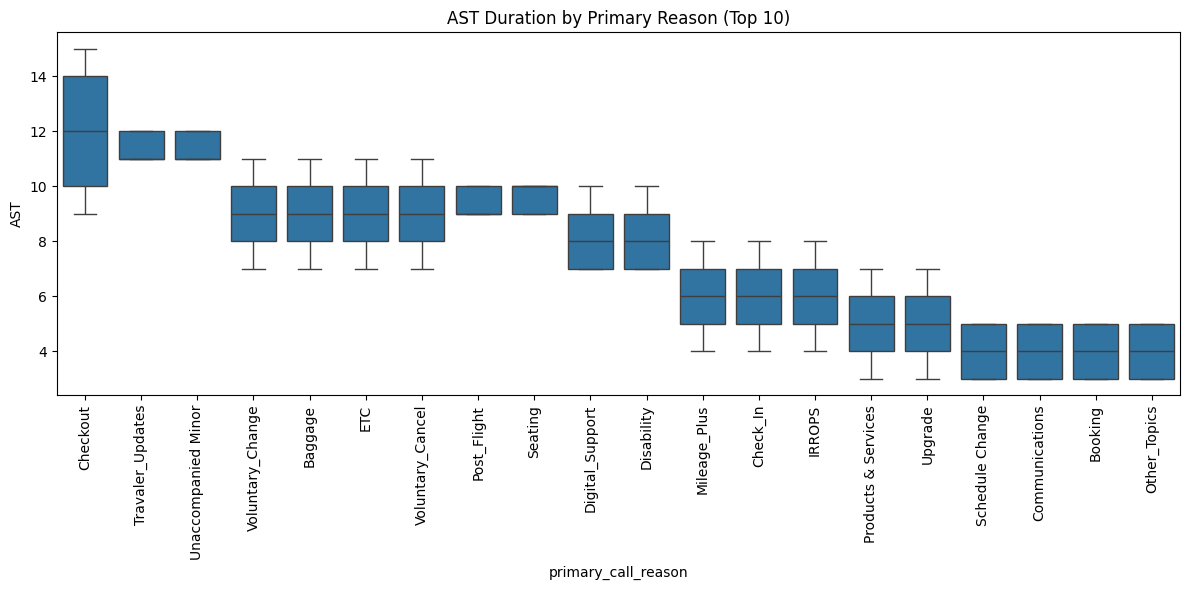

In [ ]:
# relationship between call reasons and AST
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='AST', data=merged_df.sort_values('AST', ascending=False))
plt.xticks(rotation=90)
plt.title('AST Duration by Primary Reason (Top 10)')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


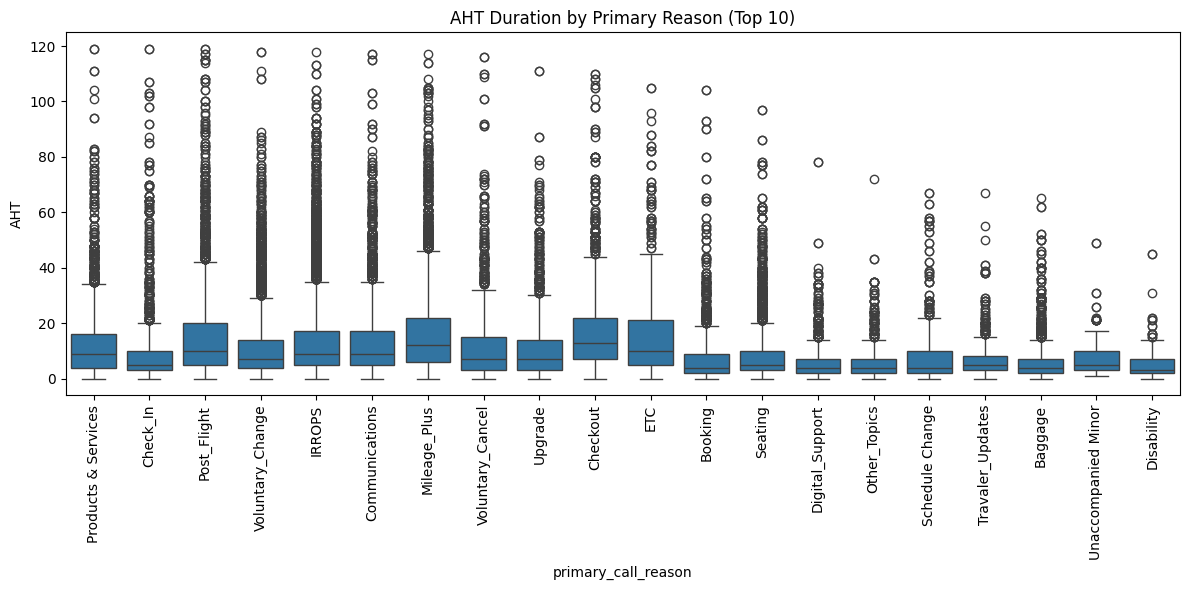

In [ ]:
# relationship between call reasons and AHT
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='AHT', data=merged_df.sort_values('AHT', ascending=False))
plt.xticks(rotation=90)
plt.title('AHT Duration by Primary Reason (Top 10)')
plt.tight_layout()
plt.show()

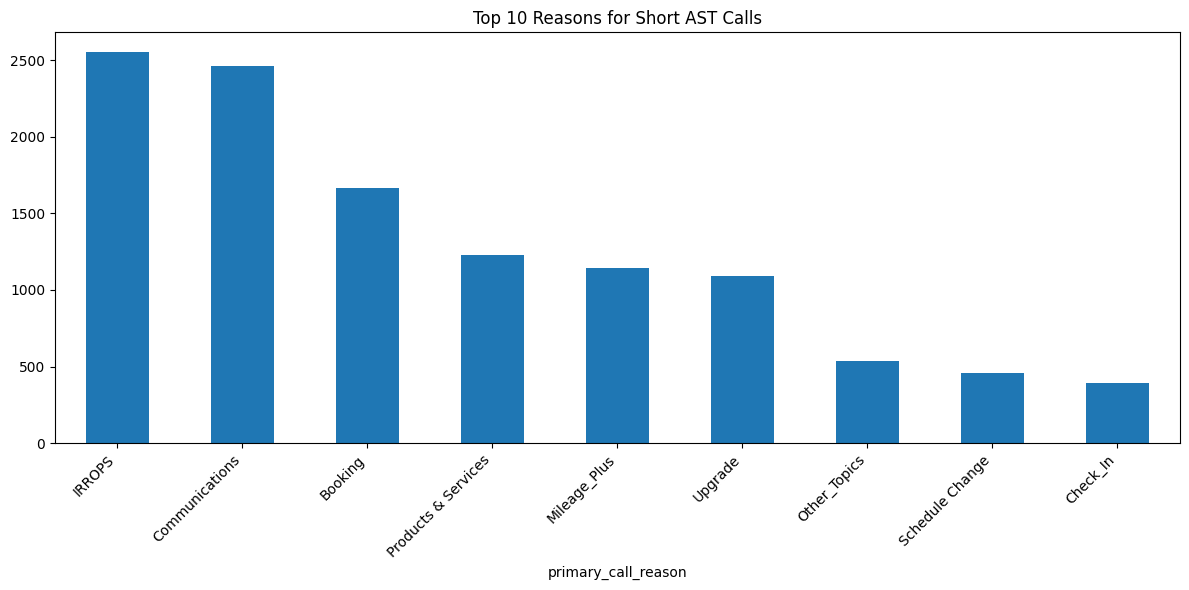

In [ ]:
# Visualizing most common reasons for short ast calls
short_call_reasons = short_calls_ast['primary_call_reason'].value_counts().head(10)
plt.figure(figsize=(12, 6))
short_call_reasons.plot(kind='bar')
plt.title('Top 10 Reasons for Short AST Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

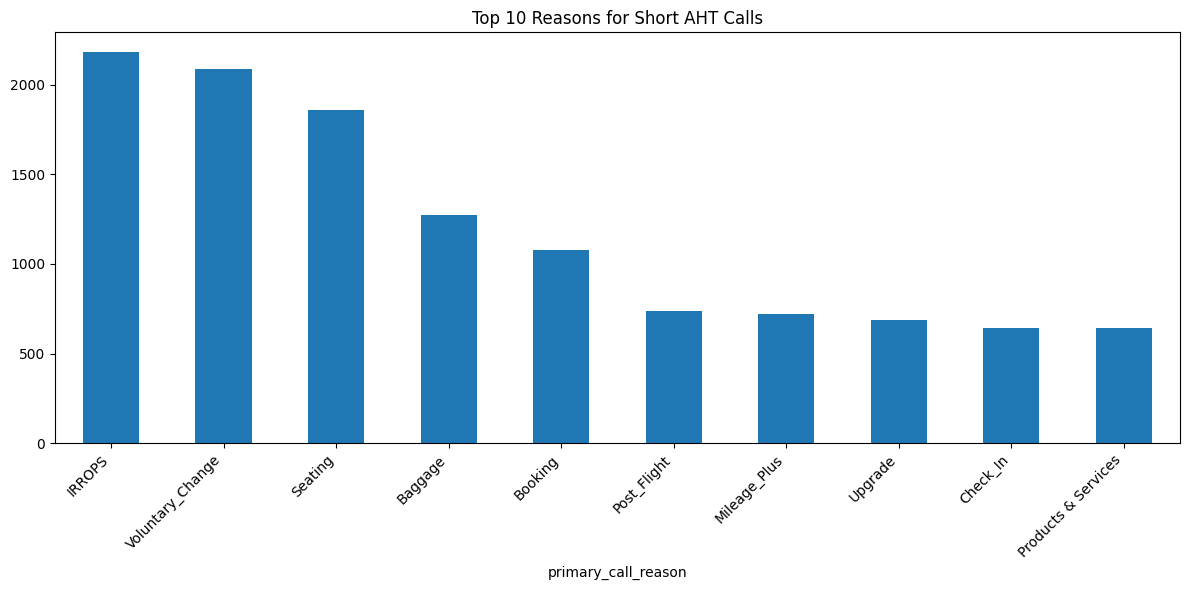

In [ ]:
# Visualizing most common reasons for short AHT calls
short_call_reasons = short_calls_aht['primary_call_reason'].value_counts().head(10)
plt.figure(figsize=(12, 6))
short_call_reasons.plot(kind='bar')
plt.title('Top 10 Reasons for Short AHT Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Topic Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Preprocessing text FUnction
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocessing transcripts on Original Data
merged_df['processed_transcript'] = merged_df['call_transcript'].apply(preprocess_text)

In [ ]:
# Download NLTK - punkt and stopwords Library
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [152]:
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,AHT,AST
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,5.0,12.0,3.0
1,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2.0,7.0,5.0
2,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0.0,9.0,10.0
3,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus,Emily Alexander,5.0,24.0,5.0
4,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,James Lawrence,2.0,13.0,13.0


In [ ]:
# topic modeling function
def perform_topic_modeling(texts, n_topics=3):
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english') ## Converting text to numeric vectors using tf-idf vectorizer
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42) ## LDA model for Genrating Topics
    lda_output = lda_model.fit_transform(tfidf_matrix)

    return lda_model, tfidf_vectorizer, lda_output

# printing top words for each topic
def print_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(', '.join(top_words))
        print(f"Topic {topic_idx}: {', '.join(top_words)}")
    return topics

# topic modeling for each primary_call_reason
reason_topics = {}
for reason in merged_df['primary_call_reason'].unique():
    print(f"\nTopics for {reason}:")
    reason_df = merged_df[merged_df['primary_call_reason'] == reason]
    lda_model, tfidf_vectorizer, lda_output = perform_topic_modeling(reason_df['processed_transcript'])
    topics = print_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)
    reason_topics[reason] = topics


Topics for Booking:
Topic 0: flight, agent, customer, change, fee, let, help, date, work, im
Topic 1: refund, experience, voucher, customer, delay, agent, offer, flight, bag, missed
Topic 2: flight, agent, customer, let, im, tomorrow, sir, delay, like, meeting

Topics for Upgrade:
Topic 0: flight, agent, customer, change, let, fee, help, im, work, need
Topic 1: seat, upgrade, economy, aisle, waitlist, legroom, premium, row, assignment, middle
Topic 2: flight, customer, agent, im, delay, let, delays, voucher, sir, refund

Topics for Seating:
Topic 0: flight, agent, customer, seat, wanted, upgrade, check, time, let, weather
Topic 1: flight, customer, agent, delay, im, let, voucher, sir, tomorrow, delayed
Topic 2: flight, change, agent, customer, fee, let, work, help, need, date

Topics for Mileage_Plus:
Topic 0: flight, agent, customer, change, fee, let, help, date, work, im
Topic 1: customer, agent, flight, refund, voucher, experience, delay, bag, im, united
Topic 2: flight, agent, cus

In [ ]:
reason_topics ## Containg top 10 Words for each primary_call_reason type

{'Booking': ['flight, agent, customer, change, fee, let, help, date, work, im',
  'refund, experience, voucher, customer, delay, agent, offer, flight, bag, missed',
  'flight, agent, customer, let, im, tomorrow, sir, delay, like, meeting'],
 'Upgrade': ['flight, agent, customer, change, let, fee, help, im, work, need',
  'seat, upgrade, economy, aisle, waitlist, legroom, premium, row, assignment, middle',
  'flight, customer, agent, im, delay, let, delays, voucher, sir, refund'],
 'Seating': ['flight, agent, customer, seat, wanted, upgrade, check, time, let, weather',
  'flight, customer, agent, delay, im, let, voucher, sir, tomorrow, delayed',
  'flight, change, agent, customer, fee, let, work, help, need, date'],
 'Mileage_Plus': ['flight, agent, customer, change, fee, let, help, date, work, im',
  'customer, agent, flight, refund, voucher, experience, delay, bag, im, united',
  'flight, agent, customer, let, tomorrow, im, pm, meeting, like, time'],
 'Checkout': ['tomorrow, flight, p

In [ ]:
import os
Home = os.getcwd()
Home

'/content/drive/MyDrive/SKYHACK_DATA'

In [ ]:
import json
# Save dictionary as a JSON file in my drive
with open('reason_topic_modelling.json', 'w') as json_file:
    json.dump(reason_topics, json_file, indent=4)

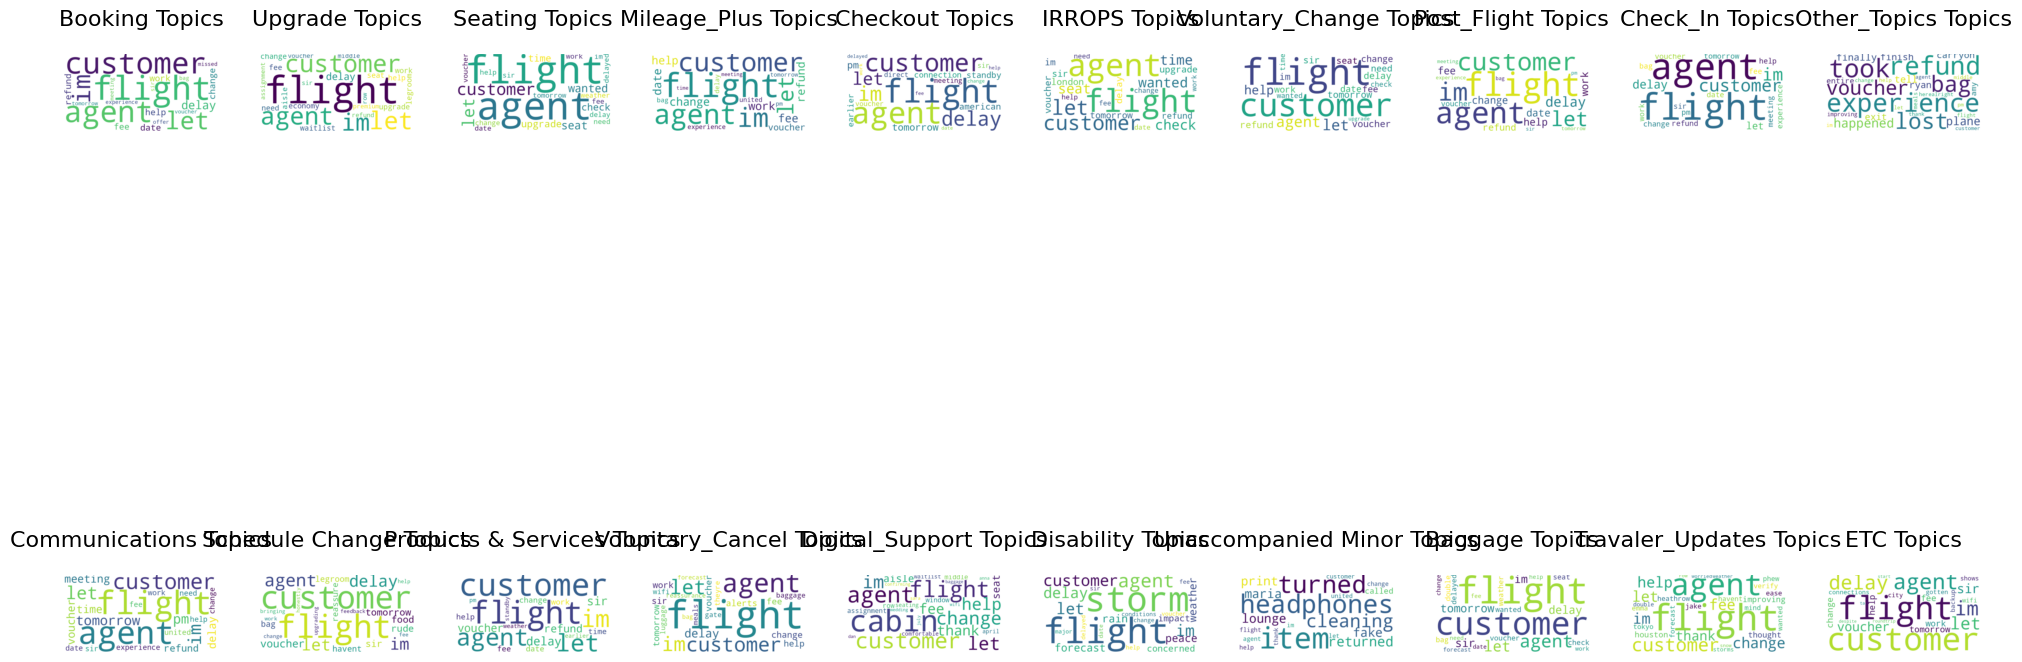

In [3]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
 ## Creating Word cloud based on each category top words
def create_wordcloud_per_category(data):
    """Create word clouds for each category in the data"""
    # Set up the matplotlib figure
    fig = plt.figure(figsize=(20, 15))
    rows = 2
    cols = (len(data) + 1) // 2  # Ceiling division to handle odd numbers

    for idx, (category, topic_lists) in enumerate(data.items(), 1):
        # Combine all topics for this category into one string
        all_topics = ' '.join([topic for topic_list in topic_lists
                             for topic in topic_list.split(', ')])

        # Create word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=50,
            min_font_size=10,
            colormap='viridis'
        ).generate(all_topics)

        # Add subplot
        plt.subplot(rows, cols, idx)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{category} Topics', fontsize=16, pad=20)

    plt.tight_layout(pad=3.0)
    plt.show()


## Creaing Combined Data Wordcloud
def create_combined_wordcloud(data):
    """Create a single word cloud combining all categories"""
    # Combine all topics into one string
    all_topics = ' '.join([
        topic
        for topic_lists in data.values()
        for topic_list in topic_lists
        for topic in topic_list.split(', ')
    ])

    # Create word cloud
    wordcloud = WordCloud(
        width=1600,
        height=800,
        background_color='white',
        max_words=100,
        min_font_size=10,
        colormap='viridis'
    ).generate(all_topics)

    # Display
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Combined Topics Across All Categories', fontsize=16, pad=20)
    plt.show()

def analyze_top_terms(data):
    """Analyze and display top terms across all categories"""
    # Combine all terms and their counts
    all_terms = Counter()
    for topic_lists in data.values():
        terms = [term.strip() for topic_list in topic_lists
                for term in topic_list.split(',')]
        all_terms.update(terms)

    # Create DataFrame of top terms
    df = pd.DataFrame.from_dict(all_terms, orient='index',
                               columns=['Count']).sort_values('Count', ascending=False)

    # Plot top 20 terms
    plt.figure(figsize=(15, 8))
    df.head(20).plot(kind='bar')
    plt.title('Top 20 Terms Across All Categories', fontsize=16)
    plt.xlabel('Terms', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return df


# Create individual word clouds for each category
create_wordcloud_per_category(call_reasons)

## Problem Statement : Propose specific improvements to the IVR options to effectively reduce agent intervention in these cases, along with solid reasoning to support your recommendations

# DELIVERABLE 03

## Problem Statement : analyze the dataset to uncover patterns that can assist in understanding and identifying these primary call reasons

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [154]:
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,AHT,AST,processed_transcript
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,5.0,12.0,3.0,agent thank calling united airlines name sam h...
1,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2.0,7.0,5.0,agent thank calling united airlines customer s...
2,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0.0,9.0,10.0,agent thank calling united airlines customer s...
3,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus,Emily Alexander,5.0,24.0,5.0,agent thank calling united airlines customer s...
4,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,James Lawrence,2.0,13.0,13.0,agent thank calling united airlines customer s...


In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['agent_tone_encoded'] = le.fit_transform(merged_df['agent_tone'])
merged_df['customer_tone_encoded'] = le.fit_transform(merged_df['customer_tone'])
merged_df['primary_call_reason_encoded'] = le.fit_transform(merged_df['primary_call_reason'])

In [156]:
merged_df.head(1)

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,AHT,AST,processed_transcript,agent_tone_encoded,customer_tone_encoded,primary_call_reason_encoded
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,5.0,12.0,3.0,agent thank calling united airlines name sam h...,0,3,1


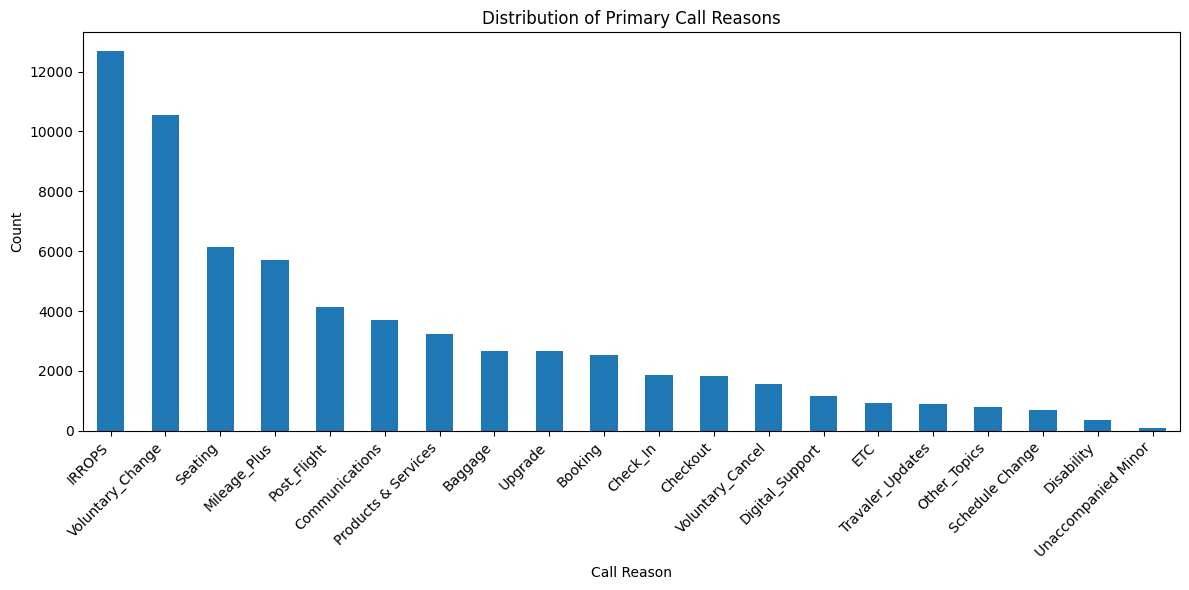

In [ ]:
# Visualizing call reason distribution
plt.figure(figsize=(12, 6))
merged_df['primary_call_reason'].value_counts().plot(kind='bar')
plt.title('Distribution of Primary Call Reasons')
plt.xlabel('Call Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

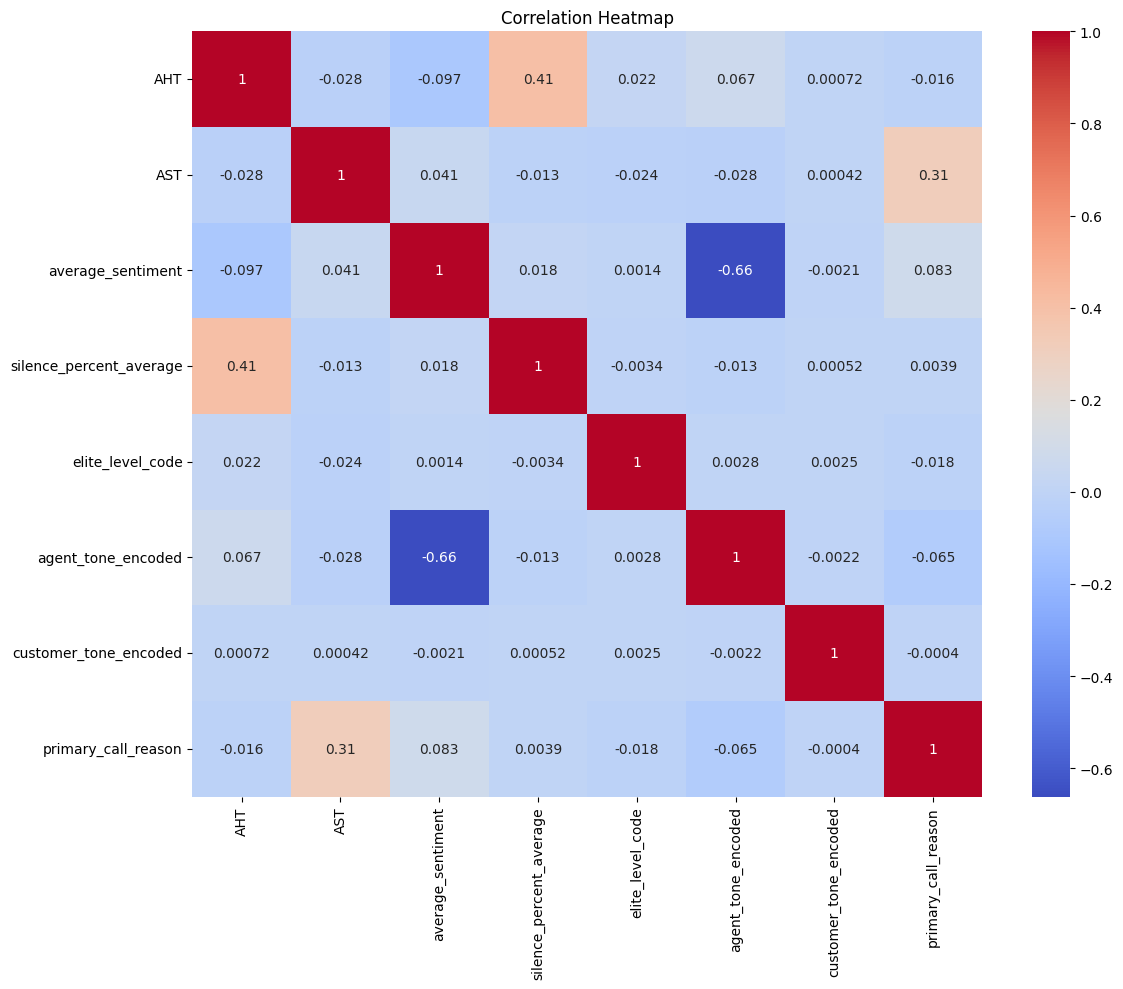

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(12, 10))
corr_matrix = merged_df[['AHT', 'AST', 'average_sentiment', 'silence_percent_average',
                  'elite_level_code', 'agent_tone_encoded', 'customer_tone_encoded', 'primary_call_reason']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [157]:
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,AHT,AST,processed_transcript,agent_tone_encoded,customer_tone_encoded,primary_call_reason_encoded
0,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,5.0,12.0,3.0,agent thank calling united airlines name sam h...,0,3,1
1,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,-0.20,0.20,Upgrade,David Wilkins,2.0,7.0,5.0,agent thank calling united airlines customer s...,2,2,17
2,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,neutral,polite,-0.05,0.35,Seating,Elizabeth Daniels,0.0,9.0,10.0,agent thank calling united airlines customer s...,2,4,14
3,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,calm,calm,0.10,0.11,Mileage_Plus,Emily Alexander,5.0,24.0,5.0,agent thank calling united airlines customer s...,0,1,9
4,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,neutral,frustrated,0.00,0.25,Checkout,James Lawrence,2.0,13.0,13.0,agent thank calling united airlines customer s...,2,2,3


In [158]:
import os
print(os.getcwd())

/content/drive/MyDrive/SKYHACK_DATA


In [159]:
# Saving cleaned merged data for deliverable 03
merged_df.to_csv('merged_clean_deliverable03.csv', index=False)

In [160]:
## merged_df = pd.read_csv('/content/drive/MyDrive/SKYHACK_DATA/merged_clean_deliverable03.csv')
# ## Do processing on dates

# # List of datetime columns
# datetime_columns = ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']

# # Loop through each datetime column to convert formats
# for col in datetime_columns:
#     # Replace '/' with '-' in the string representation
#     merged_df[col] = merged_df[col].astype(str).str.replace('/', '-', regex=False)

#     # If necessary, you can convert to datetime format
#     merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

# # Verify the conversion
# print(merged_df[datetime_columns].head())


# datetime_columns = ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']
# for col in datetime_columns:
#     merged_df[col] = pd.to_datetime(merged_df[col])

# print(type(merged_df['call_start_datetime'][800]))
# print(type(merged_df['agent_assigned_datetime'][800]))
# print(type(merged_df['call_end_datetime'][800]))

In [161]:
## Building Random FORET MODEL
def build_predictive_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    feature_importance.head(10).plot(x='feature', y='importance', kind='bar')
    plt.title('Top 10 Important Features')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()


3. Building Predictive Model
                     precision    recall  f1-score   support

            Baggage       0.22      0.07      0.11       533
            Booking       0.27      0.23      0.25       514
           Check_In       0.08      0.01      0.02       357
           Checkout       0.85      0.55      0.66       377
     Communications       0.32      0.33      0.32       757
    Digital_Support       0.26      0.03      0.05       223
         Disability       0.20      0.01      0.02        79
                ETC       0.00      0.00      0.00       172
             IRROPS       0.40      0.71      0.51      2547
       Mileage_Plus       0.37      0.29      0.33      1143
       Other_Topics       0.09      0.02      0.03       142
        Post_Flight       0.39      0.40      0.40       856
Products & Services       0.14      0.03      0.05       625
    Schedule Change       0.16      0.02      0.04       135
            Seating       0.38      0.64      0.48    

<Figure size 1000x600 with 0 Axes>

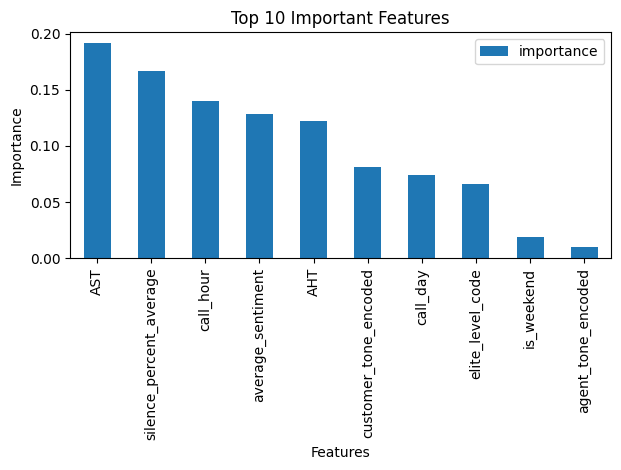

In [165]:
print("\n3. Building Predictive Model")
features = ['AHT', 'AST', 'average_sentiment', 'silence_percent_average',
            'call_hour', 'call_day', 'is_weekend', 'elite_level_code',
            'agent_tone_encoded', 'customer_tone_encoded']
X = merged_df[features]
y = merged_df['primary_call_reason']
build_predictive_model(X, y)

**ACCURACY IS LESS BUT IT CAN BE IMPROVED IN THE FUTURE WITH BETTER FEATURRES**

# THANK YOU ⚡
